                            10         100         500
native_sort            0.018835   7.258415    1.180887
bubble_sort_v0         0.096798  10.340214  331.253052
bubble_sort_v1         0.078678  11.678219  280.580759
selection_sort         0.068188   6.627321  143.409014
insertion_sort         0.062227   4.168749  109.623432
binary_insertion_sort  0.186443  14.646530   61.126709
cocktail_sort          0.094175  37.414551  258.904696
shell_sort             0.070810  15.617132   14.644623
merge_sort             0.312805   4.504442   31.495094
quick_sort             0.098467   3.137589   13.167620
heap_sort              0.161648   3.093481   29.721975
radix_sort             0.595570  12.489319   35.922050


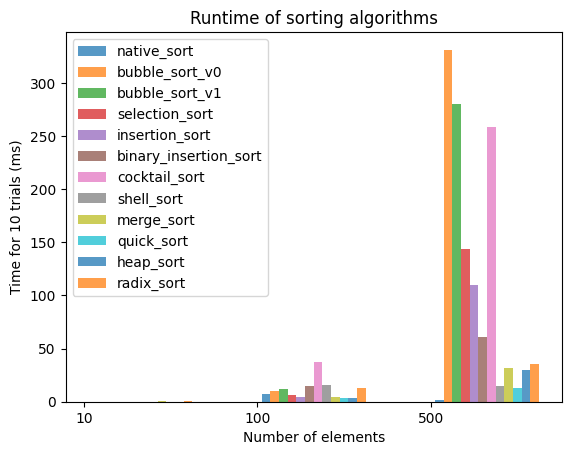

In [1]:
# 🧪 Sorting Algorithms Performance Comparison

import matplotlib.pyplot as plt
import pandas as pd
import random
import time

# Generate a random list of integers
def random_list(size):
    return [random.randint(1, 1000000) for i in range(size)]

# Native Python sort
def native_sort(arr, n):
    arr.sort()
    return arr

# Bubble Sort (basic)
def bubble_sort_v0(arr, n):
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

# Bubble Sort with early exit if sorted
def bubble_sort_v1(arr, n):
    for i in range(n):
        swapped = False
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

# Selection Sort
def selection_sort(arr, n):
    for i in range(n - 1):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Insertion Sort
def insertion_sort(arr, n):
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Binary Insertion Sort helper
def binary_search(arr, val, start, end):
    if start == end:
        return start + 1 if arr[start] <= val else start
    if start > end:
        return start
    mid = (start + end) // 2
    if arr[mid] < val:
        return binary_search(arr, val, mid + 1, end)
    elif arr[mid] > val:
        return binary_search(arr, val, start, mid - 1)
    else:
        return mid

# Binary Insertion Sort
def binary_insertion_sort(arr, n):
    for i in range(1, n):
        val = arr[i]
        j = binary_search(arr, val, 0, i - 1)
        arr = arr[:j] + [val] + arr[j:i] + arr[i + 1:]
    return arr

# Cocktail Sort (bidirectional bubble sort)
def cocktail_sort(arr, n):
    swapped = True
    start = 0
    end = n - 1
    while swapped:
        swapped = False
        for i in range(start, end):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        if not swapped:
            break
        swapped = False
        end -= 1
        for i in range(end - 1, start - 1, -1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                swapped = True
        start += 1
    return arr

# Shell Sort (gap-based insertion sort)
def shell_sort(arr, n):
    gap = n // 2
    while gap > 0:
        for j in range(gap, n):
            i = j - gap
            while i >= 0 and arr[i + gap] < arr[i]:
                arr[i + gap], arr[i] = arr[i], arr[i + gap]
                i -= gap
        gap //= 2
    return arr

# Merge Sort (recursive divide and merge)
def merge(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid
    L = [arr[left + i] for i in range(n1)]
    R = [arr[mid + 1 + j] for j in range(n2)]
    i = j = 0
    k = left
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

def merge_sort_rec(arr, left, right):
    if left < right:
        mid = (left + right) // 2
        merge_sort_rec(arr, left, mid)
        merge_sort_rec(arr, mid + 1, right)
        merge(arr, left, mid, right)

def merge_sort(arr, n):
    merge_sort_rec(arr, 0, n - 1)
    return arr

# Quick Sort (recursive partitioning)
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort_rec(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort_rec(arr, low, pi - 1)
        quick_sort_rec(arr, pi + 1, high)

def quick_sort(arr, n):
    quick_sort_rec(arr, 0, n - 1)
    return arr

# Heap Sort
def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
    if left < n and arr[left] > arr[largest]:
        largest = left
    if right < n and arr[right] > arr[largest]:
        largest = right
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr, n):
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        heapify(arr, i, 0)
    return arr

# Radix Sort (digit-by-digit sort using counting sort)
def counting_sort_for_radix(arr, exp1):
    n = len(arr)
    output = [0] * n
    count = [0] * 10
    for i in range(n):
        index = arr[i] // exp1
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr, n):
    max1 = max(arr)
    exp = 1
    while max1 // exp > 0:
        counting_sort_for_radix(arr, exp)
        exp *= 10
    return arr

# Function to check if array is sorted
def is_sorted(arr):
    for i in range(len(arr) - 1):
        if arr[i] > arr[i + 1]:
            return False
    return True

# Function to run all sorting algorithms and measure performance
def run_algs(algs, sizes, trials):
    dict_algs = {alg.__name__: {} for alg in algs}
    for size in sizes:
        for alg in algs:
            dict_algs[alg.__name__][size] = 0
        for trial in range(trials):
            arr_orig = random_list(size)
            for alg in algs:
                arr = arr_orig.copy()
                start_time = time.time()
                arr = alg(arr, size)
                end_time = time.time()
                if not is_sorted(arr):
                    print(f"{alg.__name__} failed to sort array")
                dict_algs[alg.__name__][size] += 1000 * (end_time - start_time)
    return dict_algs

# Plot performance results
def plot_times(dict_algs, sizes, trials, algs, file_name):
    alg_num = 0
    plt.xticks([j for j in range(len(sizes))], [str(size) for size in sizes])
    for alg in algs:
        alg_num += 1
        d = dict_algs[alg.__name__]
        x_axis = [j + 0.05 * alg_num for j in range(len(sizes))]
        y_axis = [d[i] for i in sizes]
        plt.bar(x_axis, y_axis, width=0.05, alpha=0.75, label=alg.__name__)
    plt.legend()
    plt.title("Runtime of sorting algorithms")
    plt.xlabel("Number of elements")
    plt.ylabel(f"Time for {trials} trials (ms)")
    plt.savefig(file_name)
    plt.show()

# Print performance results as a table
def print_times(dict_algs, filename):
    pd.set_option("display.max_rows", 500)
    pd.set_option("display.max_columns", 500)
    pd.set_option("display.width", 1000)
    df = pd.DataFrame.from_dict(dict_algs).T
    print(df)
    with open(filename, "w") as f:
        f.write(df.to_string())

# Main function to run the performance comparison
def main():
    assn = "assignment02"
    sizes = [10, 100, 500]
    algs = [
        native_sort, bubble_sort_v0, bubble_sort_v1, selection_sort, insertion_sort,
        binary_insertion_sort, cocktail_sort, shell_sort, merge_sort,
        quick_sort, heap_sort, radix_sort
    ]
    trials = 10
    dict_algs = run_algs(algs, sizes, trials)
    print_times(dict_algs, assn + ".txt")
    plot_times(dict_algs, sizes, trials, algs, assn + ".png")

if __name__ == "__main__":
    main()

# 📊 Time Complexity Table (for documentation/reference)
# | Algorithm              | Best Case | Average Case | Worst Case | Space Complexity |
# |------------------------|-----------|--------------|-------------|------------------|
# | Bubble Sort            | O(n)      | O(n^2)       | O(n^2)      | O(1)             |
# | Selection Sort         | O(n^2)    | O(n^2)       | O(n^2)      | O(1)             |
# | Insertion Sort         | O(n)      | O(n^2)       | O(n^2)      | O(1)             |
# | Merge Sort             | O(n log n)| O(n log n)   | O(n log n)  | O(n)             |
# | Quick Sort             | O(n log n)| O(n log n)   | O(n^2)      | O(log n)         |
# | Heap Sort              | O(n log n)| O(n log n)   | O(n log n)  | O(1)             |
# | Radix Sort             | O(nk)     | O(nk)        | O(nk)       | O(n + k)         |
